**Q1. Continuous Integration (CI)** <br>
 **Task 1: Set Up a CI Pipeline** <br>
 **Objective:** Set up a basic CI pipeline that builds a project automatically whenever new code is pushed. <br>
 **Tools:** GitHub Actions, Jenkins, GitLab CI, or CircleCI<br>
 **Instructions:**
 * Create a simple application (use Node.js, Python, or Java)
 * Set up a repository on GitHub or GitLab
 * Configure a CI tool to automatically build the application whenever new code is pushed to the repository
 Document each step with screenshots showing the pipeline running.

 **ANS:** <br>
 **Step 1: Create a Simple Application**

Let’s use Node.js as an example (you can also use Python or Java).

1. Install Node.js on your system.

2. Create a folder and initialize a project:

In [ ]:
mkdir ci-demo
cd ci-demo
npm init -y

# 2. Create a simple index.js
console.log("🚀 CI Pipeline Test Running Successfully!");

# 3. Add a test script in package.json
"scripts": {
  "test": "echo \"Running tests...\" && exit 0"
}

**Step 2: Push to GitHub**

1. Create a new repository on GitHub (e.g., ci-demo).

2. Push your code:

In [ ]:
git init
git remote add origin https://github.com/<your-username>/ci-demo.git
git add .
git commit -m "Initial commit with simple app"
git push -u origin main

**Step 3: Configure GitHub Actions (CI Tool)**

1. In your GitHub repo, go to Actions → New Workflow → Node.js.

2. Or manually create a workflow file: .github/workflows/ci.yml

In [ ]:
name: CI Pipeline

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
      - name: Checkout repository
        uses: actions/checkout@v3

      - name: Set up Node.js
        uses: actions/setup-node@v3
        with:
          node-version: '18'

      - name: Install dependencies
        run: npm install

      - name: Run tests
        run: npm test


**Step 4: Push and Watch the Pipeline**

* Commit and push ```.github/workflows/ci.yml```

* Go to GitHub → Actions tab.

* You’ll see your pipeline triggered automatically when you push code.

**Q2. Jenkins**<br>
**Task 2: Automated Build with Jenkins**<br>
**Objective:** Install Jenkins and configure an automated build job.<br> **Tools:** Jenkins, Docker (optional)<br>
**Instructions:**
*  Install Jenkins on your local machine or use a cloud platform (like AWS, Azure)
* Set up a simple job that clones a Git repository and builds the project (e.g., a Java project using Maven or a Node.js project).
* Set up a trigger to run the job automatically when new code is pushed to the repository.
* Take screenshots of the Jenkins job and the build logs to demonstrate success.

**Ans:**<br>
**Step 1: Install Jenkins**

You can install Jenkins either locally or using Docker.

**Using Docker:**
```
docker run -p 8080:8080 -p 50000:50000 jenkins/jenkins:lts
```

* Access Jenkins at: http://localhost:8080

* Get the initial admin password:
```
docker exec -it <container_id> cat /var/jenkins_home/secrets/initialAdminPassword
```
**Step 2: Prepare a Simple Node.js Project**

1. Create a Node.js app:

In [ ]:
mkdir jenkins-demo && cd jenkins-demo
npm init -y
echo 'console.log("Jenkins Build Successful 🚀");' > index.js

# 2. Add a test script in package.json:
"scripts": {
  "test": "echo \"Running tests...\" && exit 0"
}

# 3. Push the project to GitHub:
git init
git add .
git commit -m "Initial Jenkins demo app"
git branch -M main
git remote add origin https://github.com/<username>/jenkins-demo.git
git push -u origin main

**Step 3: Configure Jenkins Job**
1. In Jenkins dashboard → New Item → Freestyle Project → Name it node-ci-build.
2. Source Code Management → Select Git → Add repo URL (https://github.com/<username>/jenkins-demo.git).
3. Build Triggers → Check GitHub hook trigger for GITScm polling.
4. Build Steps → Execute Shell → Add commands:
```
npm install
npm test
node index.js
```

**Step 4: Set Up Webhook for Auto Trigger**

* Go to GitHub Repo → Settings → Webhooks → Add Webhook

  * Payload URL:
  ```
  http://<your-public-ip>:8080/github-webhook/
  ```
  * Content type: application/json

**Step 5: Verify Build**

* Push new code to GitHub:

In [ ]:
echo 'console.log("New build triggered 🚀");' > index.js
git add .
git commit -m "Trigger Jenkins build"
git push origin main


Q3. Testing Frameworks and Practices
 **Task 3: Write Unit Tests for an Application** <br>

 **Objective:** Write unit tests for a simple application and integrate them into a CI pipeline. <br>
 **Tools:** Jest (JavaScript), JUnit (Java), pytest (Python)<br>

**Instructions:**
* Create a small application (e.g., a calculator, to-do list, or API)
* Write unit tests for the core functions (e.g., add, delete, or update functions)
* Integrate these tests into a CI pipeline using GitHub Actions, Jenkins, or GitLab CI
* Document your work with screenshots showing the tests running in the CI pipeline.

**Step 1: Create a Small Application (Calculator Example)**

In [ ]:
function add(a, b) {
  return a + b;
}

function subtract(a, b) {
  return a - b;
}

function multiply(a, b) {
  return a * b;
}

function divide(a, b) {
  if (b === 0) throw new Error("Cannot divide by zero");
  return a / b;
}

module.exports = { add, subtract, multiply, divide };


**Step 2: Write Unit Tests Using Jest**

calculator.test.js

In [ ]:
const { add, subtract, multiply, divide } = require('./calculator');

test('adds two numbers', () => {
  expect(add(2, 3)).toBe(5);
});

test('subtracts two numbers', () => {
  expect(subtract(5, 2)).toBe(3);
});

test('multiplies two numbers', () => {
  expect(multiply(3, 4)).toBe(12);
});

test('divides two numbers', () => {
  expect(divide(10, 2)).toBe(5);
});

test('throws error when dividing by zero', () => {
  expect(() => divide(10, 0)).toThrow("Cannot divide by zero");
});


**Step 3: Setup Jest in Project**
Initialize Node.js project:

In [ ]:
npm init -y
npm install jest --save-dev

# Update package.json:
"scripts": {
  "test": "jest"
}


**Step 4: Integrate Tests into CI (GitHub Actions)**

Create workflow file: `.github/workflows/ci.yml`

In [ ]:
name: CI Pipeline with Tests

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
      - name: Checkout code
        uses: actions/checkout@v3

      - name: Setup Node.js
        uses: actions/setup-node@v3
        with:
          node-version: '18'

      - name: Install dependencies
        run: npm install

      - name: Run unit tests
        run: npm test

**Step 5: Run and Verify**

1. Push code to GitHub.

2. GitHub Actions → Actions tab → Workflow will run.
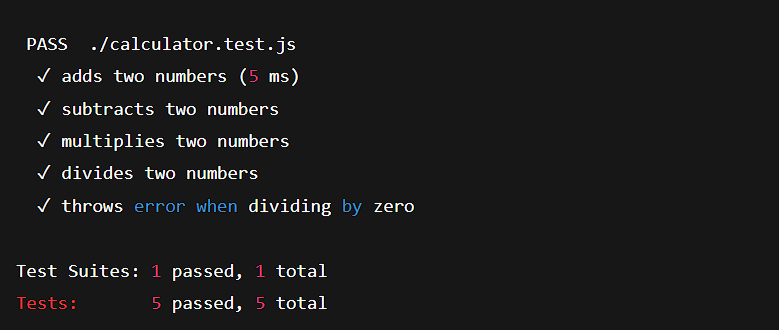


**Q4. Integration Testing**
 **Task 4: Set Up Integration Testing for an API** <br>
 **Objective:** Write integration tests for a REST API and automate them in a CI pipeline.<br>
 **Tools:**
  Postman, Newman, or Selenium (for web UI testing)<br>
 **Instructions:**
* Create a simple REST API (using Node.js, Python Flask, or Java Spring Boot)
* Write integration tests to check the interaction between different components (e.g., database and API)
* Set up the tests to run automatically in a Jenkins or GitLab CI pipeline after each deployment to a staging
environment
* Capture screenshots showing successful test execution.

**Ans:**<br>
**Step 1: Create a Simple REST API**


In [ ]:
# server.js

const express = require("express");
const app = express();
app.use(express.json());

let todos = [];

// GET all todos
app.get("/todos", (req, res) => {
  res.json(todos);
});

// POST a new todo
app.post("/todos", (req, res) => {
  const todo = { id: todos.length + 1, task: req.body.task };
  todos.push(todo);
  res.status(201).json(todo);
});

// DELETE a todo
app.delete("/todos/:id", (req, res) => {
  const id = parseInt(req.params.id);
  todos = todos.filter((t) => t.id !== id);
  res.status(204).send();
});

const PORT = 3000;
app.listen(PORT, () => console.log(`API running on port ${PORT}`));


**Run the API:**

```
npm init -y
npm install express
node server.js
```

**Step 2: Write Integration Tests in Postman**

1. Open Postman → Create a Collection (e.g., Todo API Tests).

2. Add requests:

  * GET /todos → expect status 200.

  * POST /todos → expect status 201 and returned object contains "task".

   * DELETE /todos/:id → expect status 204.

3. Export the collection as todo-tests.postman_collection.json.

**Step 3: Run Tests with Newman (CLI)**

1. Install Newman:
```
npm install -g newman
```

2 .Run tests:
```
newman run todo-tests postman_collection.json
```

Step 4: Automate Integration Tests in Jenkins


In [ ]:
# Jenkins Pipeline (Jenkinsfile)
pipeline {
    agent any

    stages {
        stage('Checkout') {
            steps {
                git 'https://github.com/<username>/todo-api.git'
            }
        }

        stage('Install Dependencies') {
            steps {
                sh 'npm install'
            }
        }

        stage('Start API') {
            steps {
                sh 'nohup node server.js &'
                sh 'sleep 5'
            }
        }

        stage('Run Integration Tests') {
            steps {
                sh 'newman run todo-tests.postman_collection.json'
            }
        }
    }
}


**Step 5: Verify Successful Tests**

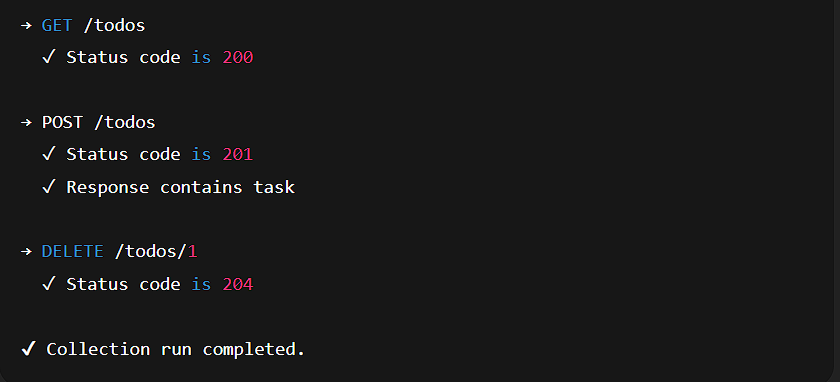

**Q5. Performance Testing**<br>
 **Task 5: Automate Performance Testing in a CI/CD Pipeline** <br>
 **Objective:** Automate performance testing using tools like Apache JMeter or K6.<br>
** Tools:** JMeter, K6, Jenkins, or GitLab CI<br>
 **Instructions:**
* Create a simple web application (or use an existing one).
* Write a JMeter or K6 test script to load test the application
* Automate the performance test in your CI/CD pipeline to run after every build
* Provide screenshots showing the performance results and graphs from the tool.

**Ans:**
**Step 1: Create a Simple Web Application**


In [ ]:
# app.js

const express = require("express");
const app = express();

app.get("/", (req, res) => {
  res.send("Hello, Performance Testing 🚀");
});

const PORT = 3000;
app.listen(PORT, () => console.log(`App running at http://localhost:${PORT}`));

# Run the app:
npm init -y
npm install express
node app.js

**Step 2: Write a K6 Test Script**

In [ ]:
# load-test.js

import http from 'k6/http';
import { sleep, check } from 'k6';

export const options = {
  vus: 10,         // Virtual users
  duration: '30s', // Test duration
};

export default function () {
  const res = http.get('http://localhost:3000/');
  check(res, { 'status was 200': (r) => r.status === 200 });
  sleep(1);
}

# Run command
k6 run load-test.js


**Step 3: Automate Performance Testing in Jenkins**


In [ ]:
pipeline {
    agent any

    stages {
        stage('Checkout') {
            steps {
                git 'https://github.com/<username>/performance-demo.git'
            }
        }

        stage('Install Dependencies') {
            steps {
                sh 'npm install'
            }
        }

        stage('Start App') {
            steps {
                sh 'nohup node app.js &'
                sh 'sleep 5'
            }
        }

        stage('Run Performance Tests') {
            steps {
                sh 'k6 run load-test.js'
            }
        }
    }
}

# OUTPUT
running (30s), 10/10 VUs, 300 complete and 0 interrupted iterations
default ✓ [======================================] 10 VUs  30s

     checks.........................: 100.00% ✓ 300 ✗ 0
     http_req_duration..............: avg=50ms   min=30ms  med=45ms  max=90ms
     http_reqs......................: 300 requests in 30s (10 rps)


**Q6. Security Testing**<br>
** Task 6: Implement Basic Security Testing in a CI Pipeline**<br>
**Objective:** Integrate security testing into the CI pipeline using tools like OWASP ZAP or SonarQube.<br>
** Tools: **OWASP ZAP, SonarQube, Jenkins, GitLab CI<br>
 **Instructions:**
 * Set up a simple web application.

 * Use OWASP ZAP to scan the application for vulnerabilities or use SonarQube for static code analysis.
 * Automate these tests in the CI pipeline to run every time code is pushed.
 * Take screenshots showing any vulnerabilities or issues detected by
the tool.

**Ans:**<br>
**Step 1: Create a Simple Web Application**

In [ ]:
# app.js
const express = require("express");
const app = express();

app.get("/", (req, res) => {
  res.send("Welcome to Security Testing Demo 🚀");
});

app.listen(3000, () => console.log("App running on http://localhost:3000"));

# Run the app:npm init -y
npm install express
node app.js


**Step 2: Set Up SonarQube for Static Code Analysis**

**Run SonarQube with Docker:**

`docker run -d --name sonarqube -p 9000:9000 sonarqube:lts`


Open at: http://localhost:9000

**Default login: admin / admin**

**SonarQube Scanner Setup in Node.js Project:**

**1. Install scanner:**
```
npm install sonar-scanner --save-dev
```
**2. Add sonar-project.properties file:**
```
sonar.projectKey=security-demo
sonar.projectName=Security Demo App
sonar.sources=.
sonar.host.url=http://localhost:9000
sonar.login=admin
```

Run analysis:
```
npx sonar-scanner
```

**Step 3: Set Up OWASP ZAP for Dynamic Testing**

**Run OWASP ZAP with Docker:**
```
docker run -t owasp/zap2docker-stable zap-baseline.py -t http://localhost:3000 -r zap_report.html
```

* This generates a vulnerability scan report (zap_report.html).

**Step 4: Automate Security Testing in Jenkins Pipeline**

Jenkinsfile

In [ ]:
pipeline {
    agent any

    stages {
        stage('Checkout') {
            steps {
                git 'https://github.com/<username>/security-demo.git'
            }
        }

        stage('Install Dependencies') {
            steps {
                sh 'npm install'
            }
        }

        stage('Start App') {
            steps {
                sh 'nohup node app.js &'
                sh 'sleep 5'
            }
        }

        stage('Static Analysis with SonarQube') {
            steps {
                sh 'npx sonar-scanner'
            }
        }

        stage('Dynamic Scan with OWASP ZAP') {
            steps {
                sh 'docker run --network=host -v $WORKSPACE:/zap/wrk/:rw owasp/zap2docker-stable zap-baseline.py -t http://localhost:3000 -r zap_report.html'
            }
        }
    }

    post {
        always {
            archiveArtifacts artifacts: 'zap_report.html', fingerprint: true
        }
    }
}


**Step 5: Verify Security Testing**

**SonarQube Results:**

* Shows code smells, vulnerabilities, bugs.

**OWASP ZAP Report (zap_report.html):**

* Highlights SQL injection, XSS, missing headers, etc.

Jenkins Console Output:
```
[SonarQube] Analysis successful: 2 code smells, 0 vulnerabilities
[OWASP ZAP] Passive scan complete: Found 1 alert - Missing X-Frame-Options header
Finished: SUCCESS

```

**Q7. Continuous Deployment (CD)** <br>

 **Task 7: Automate Deployment to Staging Environment** <br>
** Objective:** Automate the deployment of an application to a staging environment after a successful build and test.<br>
 **Tools:** Jenkins, AWS CodeDeploy, Docker, Kubernetes<br>
 **Instructions:**
 * Create a simple application (Node.js, Python, or Java)
 AWS, Docker, or Kubernetes)
 * Set up a CI pipeline that builds the application, runs tests, and deploys it to a staging environment (using
* Document the pipeline setup, and take screenshots of the deployment logs
 * Ensure the application is live and accessible from the staging environment.

**Ans:**
**Step 1: Sample Application (Node.js Example)**

In [ ]:
# app.js

const express = require('express');
const app = express();
const PORT = process.env.PORT || 3000;

app.get('/', (req, res) => {
  res.send("🚀 Hello from Continuous Deployment Pipeline - Staging Environment!");
});

app.listen(PORT, () => {
  console.log(`App running on port ${PORT}`);
});

# package.json
{
  "name": "cd-demo",
  "version": "1.0.0",
  "main": "app.js",
  "scripts": {
    "start": "node app.js",
    "test": "echo \"Running Tests...\" && exit 0"
  },
  "dependencies": {
    "express": "^4.18.2"
  }
}



**Step 2: Dockerize the App**

In [ ]:
# Dockerfile
# Use Node.js image
FROM node:18

WORKDIR /usr/src/app

COPY package*.json ./
RUN npm install

COPY . .

EXPOSE 3000
CMD ["npm", "start"]



**Step 3: Jenkins Pipeline (CD)**

In [ ]:
# Jenkinsfile
pipeline {
    agent any

    environment {
        DOCKER_IMAGE = "rohit/cd-demo:latest"
        STAGING_SERVER = "ubuntu@<STAGING_SERVER_IP>"
        APP_PATH = "/home/ubuntu/cd-demo"
    }

    stages {
        stage('Checkout') {
            steps {
                git 'https://github.com/your-repo/cd-demo.git'
            }
        }

        stage('Build') {
            steps {
                sh 'docker build -t $DOCKER_IMAGE .'
            }
        }

        stage('Test') {
            steps {
                sh 'npm test'
            }
        }

        stage('Push to DockerHub') {
            steps {
                withCredentials([usernamePassword(credentialsId: 'dockerhub-credentials',
                                                 usernameVariable: 'DOCKER_USER',
                                                 passwordVariable: 'DOCKER_PASS')]) {
                    sh 'echo $DOCKER_PASS | docker login -u $DOCKER_USER --password-stdin'
                    sh 'docker push $DOCKER_IMAGE'
                }
            }
        }

        stage('Deploy to Staging') {
            steps {
                sshagent(['staging-server-ssh']) {
                    sh """
                    ssh $STAGING_SERVER "docker pull $DOCKER_IMAGE && docker stop cd-demo || true && docker rm cd-demo || true && docker run -d --name cd-demo -p 3000:3000 $DOCKER_IMAGE"
                    """
                }
            }
        }
    }

    post {
        success {
            echo "✅ Deployment Successful! Application is live at http://<STAGING_SERVER_IP>:3000"
        }
        failure {
            echo "❌ Deployment Failed!"
        }
    }
}


**Step 4: Jenkins Setup**

1. Install plugins:

   * Docker Pipeline

   * SSH Agent

2. Add credentials:

   * DockerHub credentials (dockerhub-credentials)

   * SSH Key for staging server (staging-server-ssh)

3. Configure Jenkins pipeline job using the Jenkinsfile.

**Step 5: Staging Environment Setup**

On your staging server (EC2/VM/K8s):

```
# Install Docker
sudo apt update && sudo apt install -y docker.io

# Allow Jenkins to connect
ssh-keygen -t rsa
```